In [1]:
# import block
# some of these may not be needed
import numpy as np
from astropy.io import fits
import pdb
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rc
import matplotlib
from astropy.visualization import hist
from datetime import datetime
from pathlib import Path
import os
from ccdproc import ImageFileCollection
import ccdproc as ccdp
from astropy.modeling.models import Polynomial1D,Chebyshev1D,Legendre1D,Hermite1D, Gaussian1D,Gaussian2D,Polynomial2D
from astropy.modeling import fitting
from astropy.stats import mad_std
from astropy.nddata import CCDData, StdDevUncertainty
from scipy import stats
from astropy import units as u
from photutils.aperture import CircularAperture,CircularAnnulus
from photutils.aperture import aperture_photometry
from astropy.stats import sigma_clipped_stats
from photutils.detection import DAOStarFinder
from astropy.table import Table
from astropy.coordinates import SkyCoord

from imexam.imexamine import Imexamine

Ginga not installed, use other viewer, or no viewer


In [2]:
# import convenience plotting functions downloaded from 
# here: https://github.com/mwcraig/ccd-reduction-and-photometry-guide
phot_tutorial_dir = '/home/kyle/Homework/Astro8060/ccd-reduction-and-photometry-guide/notebooks/'
import sys
sys.path.insert(0,phot_tutorial_dir)
from convenience_functions import show_image

In [3]:
data_dir = '/mnt/chromeos/removable/ChromeSD/NoBackupImages/raw'            # raw data directory
reduced_dir = '/mnt/chromeos/removable/ChromeSD/NoBackupImages/reduced/' # working directory

In [4]:
science_files = ['a'+str(i).zfill(3)+'otzf.fits' for i in np.arange(74,173)]
del science_files[19:56]
del science_files[29:91]
del science_files[39:64]

scienceFrames = [fits.open(reduced_dir+s) for s in science_files]

---
## Problem 1

Using imexam, measure the PSF FWHM of one of the stars in the PG1633+099 Landolt standard field. Are there significant trends or variations in the FWHM for the same
star observed at different times throughout the night? How about for different stars observed at similar times but different airmasses? How about across the chip in a single
exposure? Make plots to support your findings regarding the variation of the PSF with
time/airmass/chip location.

---

/tmp/ipykernel_731/1247387940.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks()+1600)
/tmp/ipykernel_731/1247387940.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks()+1650)


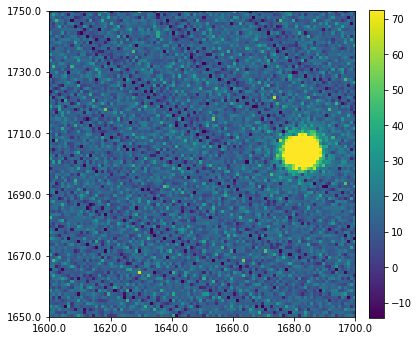

In [5]:
#Show the star of interest
fig, ax = plt.subplots(1,1,figsize=(6,6))
show_image(scienceFrames[0][0].data[1600:1700,1650:1750],fig=fig,ax=ax)
#show_image(scienceFrames[7][0].data[1600:1700,1700:1800],fig=fig,ax=ax[1])
ax.set_xticklabels(ax.get_xticks()+1600)
ax.set_yticklabels(ax.get_yticks()+1650)
plt.show()

In [6]:
#Get that star's position
starPos = []

for i in range(len(scienceFrames)):
    print('working on:',i)
    mean, median, std = sigma_clipped_stats(scienceFrames[i][0].data)
    daofind = DAOStarFinder(fwhm=3,threshold=5*std)
    sources = daofind(scienceFrames[i][0].data[1600:1700,1650:1750])
    starPos.append((sources[0]['xcentroid']+1650,sources[0]['ycentroid']+1600))

#print(starPos)

working on: 0
working on: 1
working on: 2
working on: 3
working on: 4
working on: 5
working on: 6
working on: 7
working on: 8
working on: 9
working on: 10
working on: 11
working on: 12
working on: 13
working on: 14
working on: 15
working on: 16
working on: 17
working on: 18
working on: 19
working on: 20
working on: 21
working on: 22
working on: 23
working on: 24
working on: 25
working on: 26
working on: 27
working on: 28


In [7]:
#initialize imexam
plots = Imexamine()

Science frame: 0
xc=1732.3439	yc=1653.4593
Background per pixel: 15.124611134350452
Max. pix. flux =  1069.516
amp =  1239.399
fwhm =     5.738


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


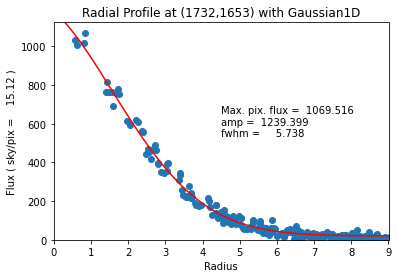

---
Science frame: 1
xc=1734.1287	yc=1653.6058
Background per pixel: 28.79316788197708
Max. pix. flux =  2713.793
amp =  3016.899
fwhm =     4.730


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


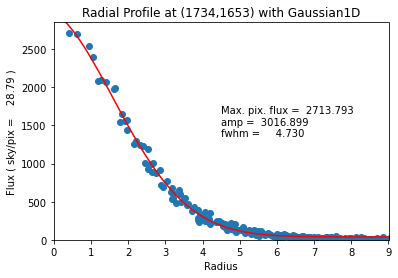

---
Science frame: 2
xc=1733.5733	yc=1653.7027
Background per pixel: 57.32256767056249
Max. pix. flux =  5935.447
amp =  7343.798
fwhm =     4.899


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


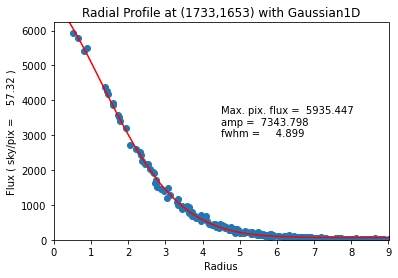

---
Science frame: 3
xc=1744.9337	yc=1604.1091
Background per pixel: 98.89117339837121
Max. pix. flux =    32.379
amp =  -105.547
fwhm =    58.710


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


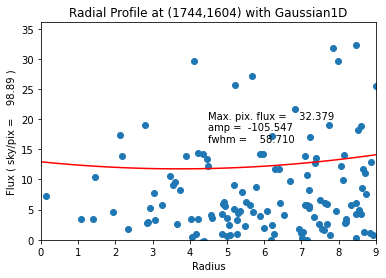

---
Science frame: 4
xc=1650.5779	yc=1600.5718
Background per pixel: 199.24623393763997
Max. pix. flux =    42.042
amp = -1870.395
fwhm =     0.000


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


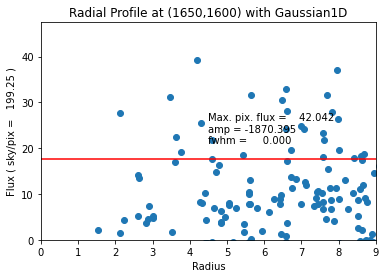

---
Science frame: 5
xc=1655.3685	yc=1595.6933
Background per pixel: 394.158388749765
Max. pix. flux =    47.729
amp =    75.199
fwhm =    15.684


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


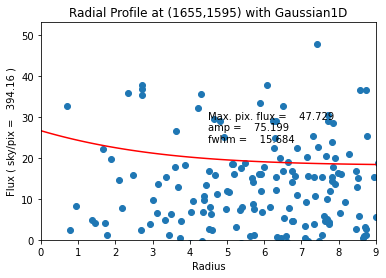

---
Science frame: 6
xc=1731.9948	yc=1595.3435
Background per pixel: 796.1862626115866
Max. pix. flux =    58.266
amp =     6.534
fwhm =     0.000


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


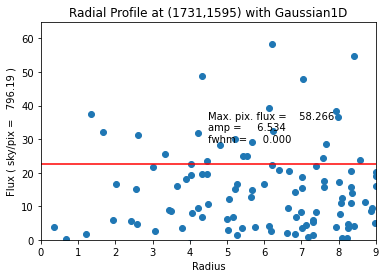

---
Science frame: 7
xc=1726.5042	yc=1650.4592
Background per pixel: 8.798552503611337
Max. pix. flux =   218.061
amp =   220.704
fwhm =     4.327


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


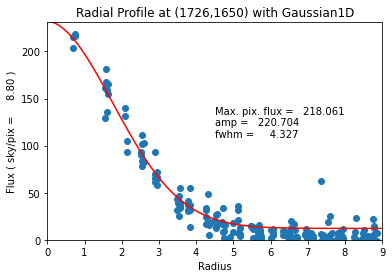

---
Science frame: 8
xc=1726.6838	yc=1650.4007
Background per pixel: 32.32765350670049
Max. pix. flux =   917.802
amp =   971.411
fwhm =     4.533


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


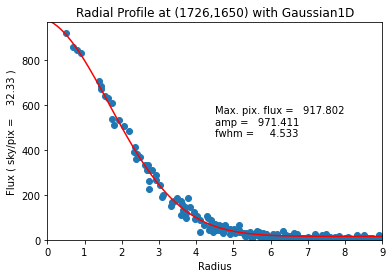

---
Science frame: 9
xc=1736.3385	yc=1587.4634
Background per pixel: 77.86883040106143
Max. pix. flux =    34.228
amp =    -5.368
fwhm =     0.000


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


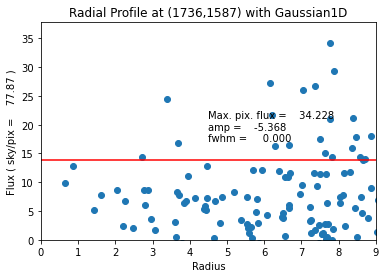

---
Science frame: 10
xc=1684.7224	yc=1599.5507
Background per pixel: 77.88188426388243
Max. pix. flux =    34.442
amp =  1645.409
fwhm =     6.093


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


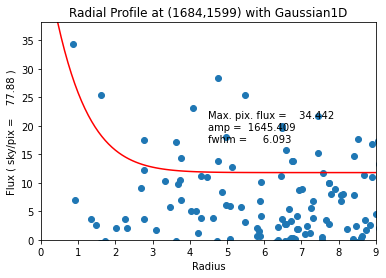

---
Science frame: 11
xc=1650.4413	yc=1601.1725
Background per pixel: 122.8654878348207
Max. pix. flux =    41.715
amp =    13.709
fwhm =     1.049


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


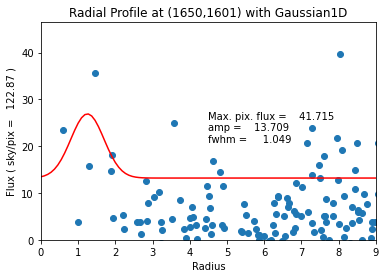

---
Science frame: 12
xc=1724.2438	yc=1650.8388
Background per pixel: 68.76158537238871
Max. pix. flux =  7386.541
amp =  7974.940
fwhm =     4.649


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


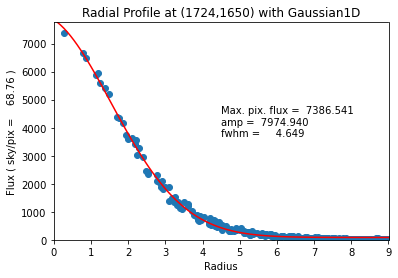

---
Science frame: 13
xc=1654.6230	yc=1594.4322
Background per pixel: 103.94197938611494
Max. pix. flux =    49.566
amp =    13.206
fwhm =     0.164


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


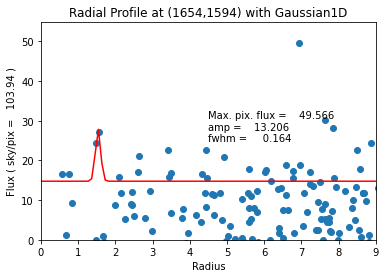

---
Science frame: 14
xc=1649.4602	yc=1598.8748
Background per pixel: 102.81892677592955
Max. pix. flux =    40.181
amp =    59.415
fwhm =     0.137


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


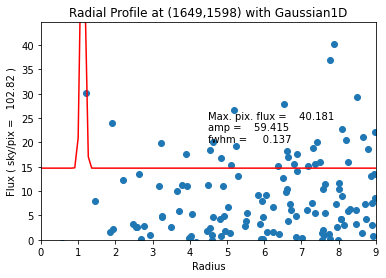

---
Science frame: 15
xc=1670.7572	yc=1613.6176
Background per pixel: 380.8701248135065
Max. pix. flux =   146.886
amp =   121.500
fwhm =     3.025


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


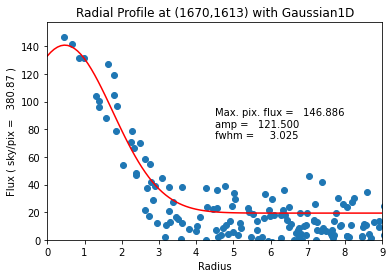

---
Science frame: 16
xc=1651.8372	yc=1598.3755
Background per pixel: 379.41422389484023
Max. pix. flux =    48.183
amp = -1524.907
fwhm =     0.000


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


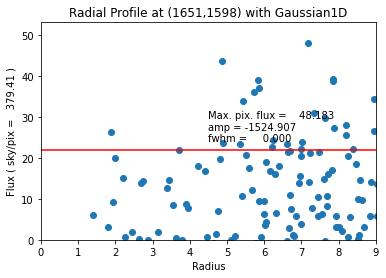

---
Science frame: 17
xc=1719.7163	yc=1651.3171
Background per pixel: 29.690971504783256
Max. pix. flux =  2540.379
amp =  2676.630
fwhm =     4.109


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


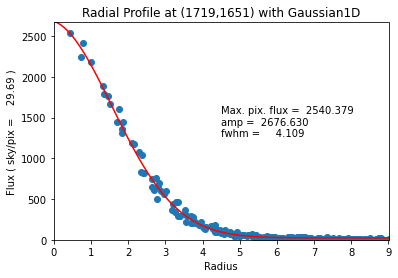

---
Science frame: 18
xc=1731.0265	yc=1633.3197
Background per pixel: 28.519924728042422
Max. pix. flux =  1005.925
amp = 30904.828
fwhm =     4.465


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


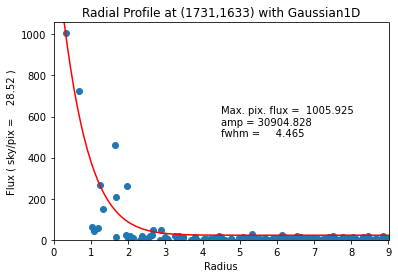

---
Science frame: 19
xc=1669.3927	yc=1643.9217
Background per pixel: 25.551805006048376
Max. pix. flux =   801.228
amp =   920.782
fwhm =     5.430


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


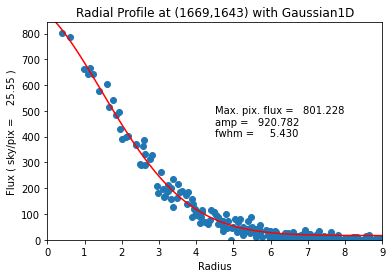

---
Science frame: 20
xc=1668.6123	yc=1644.0679
Background per pixel: 25.29343015192304
Max. pix. flux =   891.113
amp =  1124.429
fwhm =     5.533


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


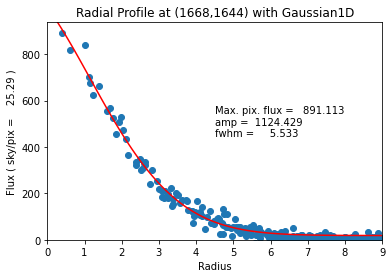

---
Science frame: 21
xc=1668.6556	yc=1644.6169
Background per pixel: 81.19057453167305
Max. pix. flux =  8075.035
amp = 19579.057
fwhm =     7.867


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


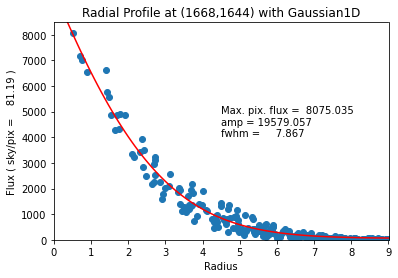

---
Science frame: 22
xc=1650.4535	yc=1605.5558
Background per pixel: 70.81907444960632
Max. pix. flux =    50.568
amp =    -9.191
fwhm =     2.123


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


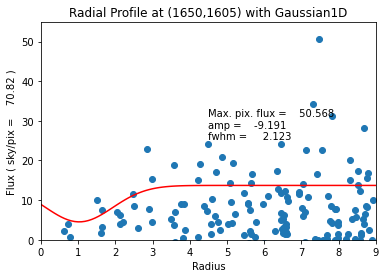

---
Science frame: 23
xc=1668.3214	yc=1644.9995
Background per pixel: 61.073033162609775
Max. pix. flux =  8308.984
amp = 11877.275
fwhm =     5.317


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


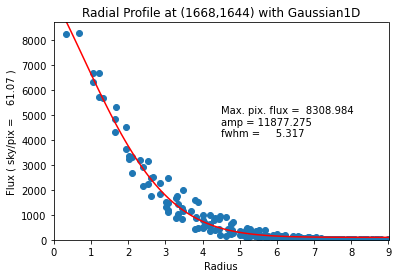

---
Science frame: 24
xc=1748.0776	yc=1599.6145
Background per pixel: 52.127192878342704
Max. pix. flux =    30.745
amp =     7.189
fwhm =     1.878


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


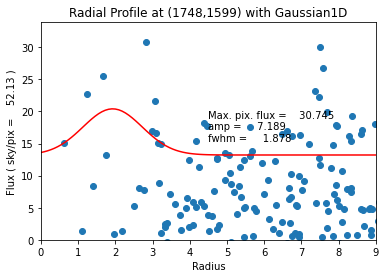

---
Science frame: 25
xc=1667.9173	yc=1645.6597
Background per pixel: 104.17296602021615
Max. pix. flux = 19712.612
amp = 26504.981
fwhm =     4.351


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


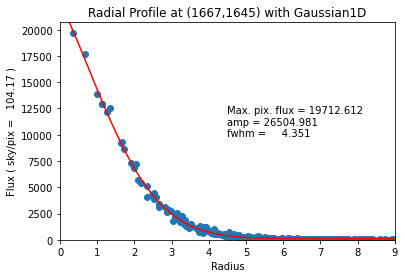

---
Science frame: 26
xc=1740.6154	yc=1598.7510
Background per pixel: 90.68171575459597
Max. pix. flux =    42.578
amp =     2.591
fwhm =     6.173


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


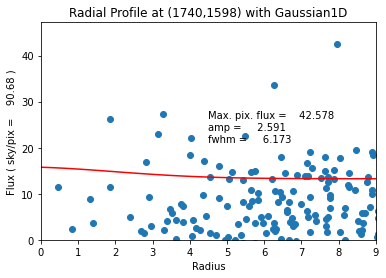

---
Science frame: 27
xc=1667.3317	yc=1645.9713
Background per pixel: 339.8690181753704
Max. pix. flux = 20343.636
amp = 24006.025
fwhm =     3.607


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


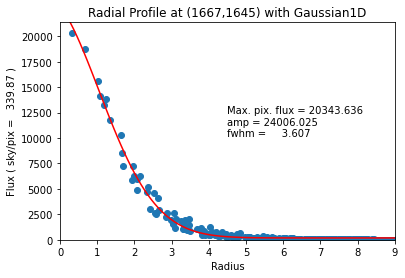

---
Science frame: 28
xc=1650.5717	yc=1597.2630
Background per pixel: 325.84840990999044
Max. pix. flux =    83.252
amp =  -187.671
fwhm =     0.000


/home/kyle/anaconda3/envs/astro8060/lib/python3.9/site-packages/imexam/math_helper.py:177: RuntimeWarning: invalid value encountered in log
  z = np.nan_to_num(np.log(flux))


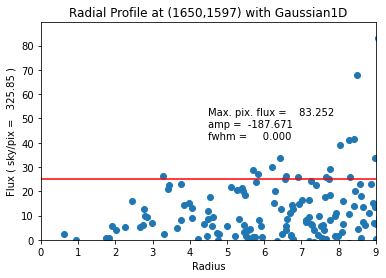

---


In [8]:
#t = []
for i in range(int(len(science_files))):
    try:
        print('Science frame:',str(i))
        plots.radial_profile(starPos[i][0],starPos[i][1],scienceFrames[i][0].data, genplot=True)
        print('---')
        #t = plots.line_fit(starPos[0],starPos[1],scienceFrames[i*2][0].data,genplot=False)
    except:
        print(i)

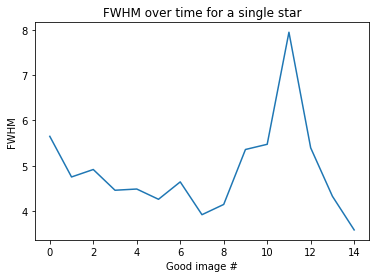

Good FWHM: 4.666714285714286


In [9]:
#Manually take the FWHM from each good gaussian fit
fwhm = np.array([5.649, 4.750, 4.915, 4.456, 4.483, 4.256, 4.641, 3.915, 4.142, 5.358, 5.473, 
                 7.953, 5.395, 4.323, 3.578])

plt.plot(fwhm)
plt.title('FWHM over time for a single star')
plt.ylabel('FWHM')
plt.xlabel('Good image #')
plt.show()

bestFwhm = np.average(fwhm[fwhm<7.9])
print('Good FWHM:',bestFwhm)

In [10]:
#Get PSF accross chip

mean, median, std = sigma_clipped_stats(scienceFrames[0][0].data)
daofind = DAOStarFinder(fwhm=3,threshold=7*std)
sources = daofind(scienceFrames[i][0].data[750:1500,750:1500])
starPos = [(s['xcentroid']+750,s['ycentroid']+750) for s in sources]
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,1.5637603484111928,1.4543476794323633,0.22222182680053776,-0.12627442362449456,0.0033617091667530684,25,0.0,336.6871626242352,4.265758164835467,-1.5749905767670254
2,260.34379785415,5.013300169182402,0.8551763271010058,0.3130391763121693,-0.6588606018396763,25,0.0,383.522989805084,1.0667863772762647,-0.0701936529225453
3,695.0824242108829,8.35892494927959,0.4176842085959777,0.132694822096783,0.4337884179152716,25,0.0,462.5469269789774,2.37268544856428,-0.9381004169639162
4,164.97634439953205,9.009829085869452,0.5670678199910228,-0.3274975687958645,0.002187481819070168,25,0.0,365.7045764981876,1.0922234071678285,-0.09577869889035115
5,171.72597820121837,8.91030261973752,0.7642183021453418,0.6678336741485907,0.6698695480666687,25,0.0,379.26219242534347,1.0306413994208903,-0.03276895869061225
6,645.8054682070148,10.00804398381535,0.7072748182126546,-0.08950807059191518,-0.14361374512918532,25,0.0,534.0915511214876,2.7045365926034273,-1.080232154645094
7,424.17060038814526,12.512692289206027,0.655072789286435,-0.03565474212806281,0.3084640254752396,25,0.0,382.71588047580553,1.4353963604622773,-0.3924296017918202
8,176.60931963632362,14.271163579844066,0.8663685350242772,0.12707773325396376,-0.041450958322010775,25,0.0,376.03125557696984,1.0153225031225028,-0.016510029465134232
9,482.8272729111308,13.649588667302938,0.28936996994808045,0.6996112084420926,-0.12077988816864187,25,0.0,350.847867298665,1.053477574062817,-0.056563237462495246


In [11]:
#Get all widths
chipFWHM = []

for s in starPos:
    rets = plots.line_fit(s[0],s[1],scienceFrames[0][0].data,genplot=False)
    chipFWHM.append(rets[0].fwhm)
    
chipFWHM = np.array(chipFWHM)

using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=754.8442	yc=749.0979
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1009.9037	yc=759.8781
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1447.9872	yc=756.6141
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=907.1195	yc=752.1032
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=923.5534	yc=764.8987
using model: <class 'astropy.modeling.functional_models.Ga

xc=819.4889	yc=805.7900
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1325.0265	yc=802.2575
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1107.0972	yc=802.9180
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1125.2656	yc=818.5384
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1249.7393	yc=780.0309
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1016.0541	yc=805.2383
using model: <class 'astropy.mo

xc=1112.7686	yc=866.1330
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=835.3535	yc=866.2331
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=860.0124	yc=845.4210
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1386.7362	yc=867.8506
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=935.3963	yc=869.1837
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=963.7917	yc=873.5194
using model: <class 'astropy.model

xc=1041.7814	yc=932.7115
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1414.3057	yc=927.4953
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=960.0403	yc=926.8347
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=808.5629	yc=929.9694
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=797.3841	yc=935.7975
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=806.9221	yc=938.0260
using model: <class 'astropy.model

xc=928.7025	yc=977.9852
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1006.8490	yc=979.3003
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1057.2451	yc=985.5840
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1220.5457	yc=988.0725
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1469.0269	yc=982.0182
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=758.9330	yc=995.1637
using model: <class 'astropy.mod

xc=1027.1596	yc=1051.7382
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=806.6721	yc=1061.3878
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=867.8717	yc=1061.6251
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=920.5361	yc=1053.6322
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1344.8574	yc=1076.8787
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=954.0131	yc=1070.4602
using model: <class 'astropy

xc=1115.6767	yc=1107.0297
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1028.5409	yc=1099.6441
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1052.0065	yc=1124.3535
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1233.9002	yc=1118.3385
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1370.4959	yc=1115.6373
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1391.9803	yc=1125.5683
using model: <class 'ast

xc=778.5121	yc=1199.3675
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1199.1937	yc=1182.4524
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1237.2109	yc=1180.1381
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=849.6937	yc=1178.0644
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=898.9281	yc=1189.5686
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1027.1793	yc=1191.3627
using model: <class 'astrop

xc=1197.6337	yc=1239.4872
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1140.8426	yc=1237.9744
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1303.8584	yc=1234.3006
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1357.8683	yc=1249.2295
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1453.7414	yc=1222.0882
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=925.6967	yc=1232.8215
using model: <class 'astr

xc=1170.1048	yc=1299.6079
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1392.5655	yc=1293.0734
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1420.4792	yc=1299.2215
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1256.1922	yc=1299.0042
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1386.3888	yc=1300.4927
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1206.1768	yc=1304.8083
using model: <class 'ast

xc=1242.8151	yc=1358.7231
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1048.6160	yc=1375.4329
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1102.3162	yc=1371.0667
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1307.8609	yc=1350.0537
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1484.0412	yc=1364.7014
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1256.1265	yc=1368.8759
using model: <class 'ast

xc=854.5065	yc=1422.0719
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1366.1899	yc=1427.8526
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1316.7829	yc=1429.8836
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1025.9013	yc=1436.3262
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=823.3823	yc=1432.4165
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1079.1114	yc=1442.2647
using model: <class 'astro

xc=1478.7681	yc=1487.3057
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=911.1895	yc=1484.1695
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=870.8076	yc=1492.9177
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1038.4865	yc=1488.4989
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1338.7478	yc=1495.3522
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1326.3602	yc=1495.1799


2.379746868826742


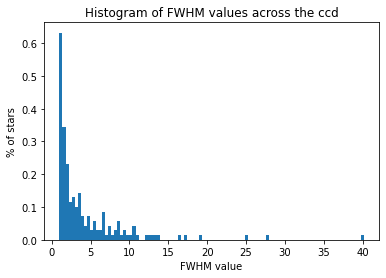

In [12]:
chipFWHM = chipFWHM[chipFWHM<100]
chipFWHM = chipFWHM[chipFWHM>1]

print(np.median(chipFWHM))
plt.hist(chipFWHM,bins=100,density=True)
plt.title('Histogram of FWHM values across the ccd')
plt.ylabel('% of stars')
plt.xlabel('FWHM value')
plt.show()

In [72]:
#Different airmasses
#Both images are taken nearly the same time
airmasses = (1.10,1.75)
img1 = fits.open(reduced_dir+'a160.fits')[0].data
img2 = fits.open(reduced_dir+'a166.fits')[0].data

mean1, median1, std1 = sigma_clipped_stats(img1)
mean2, median2, std2 = sigma_clipped_stats(img2)

daofind = DAOStarFinder(fwhm=3,threshold=5*std1)

sources1 = daofind(img1[200:-200,200:-200])
sources2 = daofind(img2[200:-200,200:-200])

#Get 500 stars
starPos1 = [(s['xcentroid']+200,s['ycentroid']+200) for s in sources1][:500]
starPos2 = [(s['xcentroid']+200,s['ycentroid']+200) for s in sources2][:500]

starPos1 = np.array(starPos1)
starPos2 = np.array(starPos2)


In [73]:
print(len(starPos2))

500


In [74]:
img1fwhm = []
img2fwhm = []

for i in range(500):
    try:
        rets = plots.line_fit(starPos1[i,0],starPos1[i,1],img1,genplot=False)
        img1fwhm.append(rets[0].fwhm)
    
        rets = plots.line_fit(starPos2[i,0],starPos2[i,1],img2,genplot=False)
        img2fwhm.append(rets[0].fwhm)
    except Exception as e:
        print(e)
    
img1fwhm = np.array(img1fwhm)
img2fwhm = np.array(img2fwhm)

using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=2000.6068	yc=199.7826
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=201.0415	yc=200.9724
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1826.7319	yc=204.2227
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1436.9508	yc=199.7884
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1826.7135	yc=204.2274
using model: <class 'astropy.modeling.functional_models.

xc=1248.0000	yc=251.9955
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1771.6824	yc=294.8889
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=680.6745	yc=253.8576
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=520.2121	yc=290.7504
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=977.5078	yc=254.2979
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1771.6832	yc=294.8889
using model: <class 'astropy.mode

xc=326.6657	yc=300.3592
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=292.1181	yc=350.6792
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=402.0145	yc=303.2967
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=613.8959	yc=356.4813
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1314.4457	yc=301.5147
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1850.0097	yc=357.6278
using model: <class 'astropy.model

xc=532.8414	yc=314.3150
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1363.8063	yc=411.5620
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=740.9013	yc=323.0794
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1872.5838	yc=417.2683
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=471.2326	yc=326.2728
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1872.5825	yc=417.2683
using model: <class 'astropy.mode

xc=1077.2919	yc=356.5107
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1850.5070	yc=459.4748
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=670.8802	yc=357.8249
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1850.5070	yc=459.4748
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1095.0962	yc=357.7721
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1850.5573	yc=459.4850
using model: <class 'astropy.mo

xc=537.5643	yc=391.8510
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1894.1309	yc=511.7682
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=635.1454	yc=392.1928
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1416.1737	yc=517.8585
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1312.2728	yc=398.1095
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1894.1255	yc=511.7690
using model: <class 'astropy.mod

xc=1815.9751	yc=419.2698
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1374.4558	yc=566.3795
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1260.0039	yc=420.3584
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1880.8489	yc=569.5470
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=580.5910	yc=423.2889
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=888.0092	yc=569.4343
using model: <class 'astropy.mod

xc=693.5859	yc=455.3470
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1439.8354	yc=625.3083
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=772.2967	yc=451.7505
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1439.8345	yc=625.3083
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=574.1467	yc=453.3386
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1416.9824	yc=625.6410
using model: <class 'astropy.mode

xc=872.5414	yc=470.4926
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1989.1427	yc=689.7372
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=678.7183	yc=471.4245
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1989.1318	yc=689.7410
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=519.3817	yc=472.8759
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1068.3722	yc=697.8831
using model: <class 'astropy.mode

xc=551.0305	yc=494.7629
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1065.4982	yc=747.5586
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=568.8894	yc=489.9948
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1065.4978	yc=747.5589
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=607.5359	yc=493.5319
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1065.4981	yc=747.5588
using model: <class 'astropy.mode

xc=856.1015	yc=501.6213
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1404.6797	yc=786.5425
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=681.2674	yc=504.2680
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1492.9827	yc=789.0889
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=739.5713	yc=503.8483
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=977.4553	yc=786.2429
using model: <class 'astropy.model

xc=1010.6522	yc=526.8299
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=810.9687	yc=875.1414
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1030.6795	yc=526.6303
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1846.0223	yc=878.5524
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=512.2160	yc=531.5580
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1497.9554	yc=879.4136
using model: <class 'astropy.mod

xc=496.4213	yc=561.3287
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1466.6798	yc=911.3607
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1105.4020	yc=560.4449
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1328.7824	yc=914.1842
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1821.4765	yc=562.3592
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1328.7826	yc=914.1840
using model: <class 'astropy.mo

xc=556.6399	yc=581.9921
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1136.7846	yc=953.7791
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=523.8288	yc=576.7616
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1136.7841	yc=953.7791
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=277.6079	yc=585.0914
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1422.6441	yc=960.6441
using model: <class 'astropy.mode

xc=718.1729	yc=603.0255
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=215.4384	yc=1004.6130
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=444.9869	yc=609.7228
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1614.9133	yc=1000.5727
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=401.0421	yc=610.7325
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1091.8160	yc=1001.2422
using model: <class 'astropy.mo

xc=1195.9073	yc=624.2159
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1269.5219	yc=1039.5696
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=856.0350	yc=624.7866
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1254.5579	yc=1031.8246
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=960.5149	yc=630.0252
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1281.6587	yc=1031.2567
using model: <class 'astropy.

xc=1151.3871	yc=642.5665
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1298.7565	yc=1079.6657
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1043.7181	yc=643.5112
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1379.7371	yc=1084.9117
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1082.7473	yc=643.2407
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1379.7361	yc=1084.9117
using model: <class 'astrop

xc=1615.9460	yc=661.2987
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1466.3141	yc=1112.6331
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1317.1535	yc=661.7377
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=221.9209	yc=1119.2290
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=443.5113	yc=662.2639
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=421.4256	yc=1119.2857
using model: <class 'astropy.m

xc=981.7253	yc=688.0114
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1509.5190	yc=1154.0923
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1746.4493	yc=690.2089
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1355.0431	yc=1155.1536
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=963.3171	yc=695.6534
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1922.1227	yc=1158.1571
using model: <class 'astropy.

xc=598.7523	yc=714.4139
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1647.6806	yc=1195.1953
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=439.0811	yc=715.7004
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=515.8126	yc=1195.8258
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1110.5331	yc=716.1028
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1580.0351	yc=1195.6676
using model: <class 'astropy.m

xc=519.3946	yc=746.8445
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1348.9211	yc=1221.7263
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=351.6771	yc=749.3581
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=753.9527	yc=1232.4848
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1375.2631	yc=749.5081
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=891.1855	yc=1236.8290
using model: <class 'astropy.mo

xc=1753.5147	yc=780.0374
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=677.4949	yc=1296.3420
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=457.1986	yc=781.5547
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1069.7610	yc=1298.7707
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1468.5084	yc=781.2420
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1126.6286	yc=1303.4924
using model: <class 'astropy.

xc=1887.5175	yc=812.0023
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1838.9987	yc=1392.2161
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=883.1507	yc=822.6448
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=1838.9976	yc=1392.2160
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=527.1598	yc=813.9296
using model: <class 'astropy.modeling.functional_models.Gaussian1D'>
Name: Gaussian1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'mean', 'stddev')
xc=651.4834	yc=1387.8023
using model: <class 'astropy.m

Median FWHM for X =1.1: 6.679387497072483
Median FWHM for X =1.75: 3.729694823709093


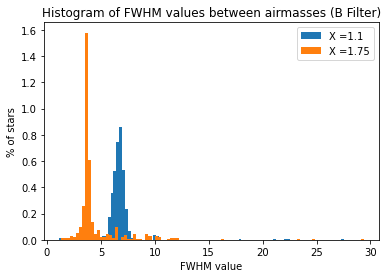

In [85]:
img1fwhm = img1fwhm[img1fwhm<30]
img1fwhm = img1fwhm[img1fwhm>1]

img2fwhm = img2fwhm[img2fwhm<30]
img2fwhm = img2fwhm[img2fwhm>1]


print('Median FWHM for X =1.1: {}'.format(np.median(img1fwhm)))
print('Median FWHM for X =1.75: {}'.format(np.median(img2fwhm)))
plt.hist(img1fwhm,bins=100,density=True,label='X ='+str(airmasses[0]))
plt.hist(img2fwhm,bins=100,density=True,label='X ='+str(airmasses[1]))
plt.title('Histogram of FWHM values between airmasses (B Filter)')
plt.ylabel('% of stars')
plt.xlabel('FWHM value')
plt.legend()
plt.show()

### Discussion

Based on the above results, two variables do not change the FWHM of the star in the CCD. These two variables being the time of night, which results only in minor changes (given there is no dramatic shift in weather), and location on the CCD, which variations seem roughly gaussian around a central value. 

The one variable that does substantially change the FWHM value is the airmass. Because the airmass effects the amount of atmosphere the starlight needs to travel through, it intuitively makes sense that higher airmass should make the size of the star bigger in the CCD. HOWEVER, this does not seem to be supported by the data gathered. From what was examined, where both images were taken within a half hour of eachother with different airmasses, the image with the lower airmass had higher average values of the FWHM, even with the same filter. I suspect that the weather may play a significant role, but I'm not certain.

---
## Problem 2

CCDs are ideal because over the available dynamic range, they are very linear (that is,
one photon produces on electron).Test the linearity of the CCD using the sequence of
exposures labeled linearity test in the log. Make a plot of ADU versus time and determine
whether the chip is linear to the full 16 bits of the A-D converter. What you care about
here is whether the signal stays linear with exposure time as the flux in the peak pixel
approaches the $2^{16}$ ADU limit.

---

In [87]:
linearityTestFiles = ['a'+str(i).zfill(3)+'ot.fits' for i in np.arange(74,81)]

linearityTest = [fits.open(reduced_dir+s) for s in linearityTestFiles]

print(linearityTestFiles)

['a074ot.fits', 'a075ot.fits', 'a076ot.fits', 'a077ot.fits', 'a078ot.fits', 'a079ot.fits', 'a080ot.fits']


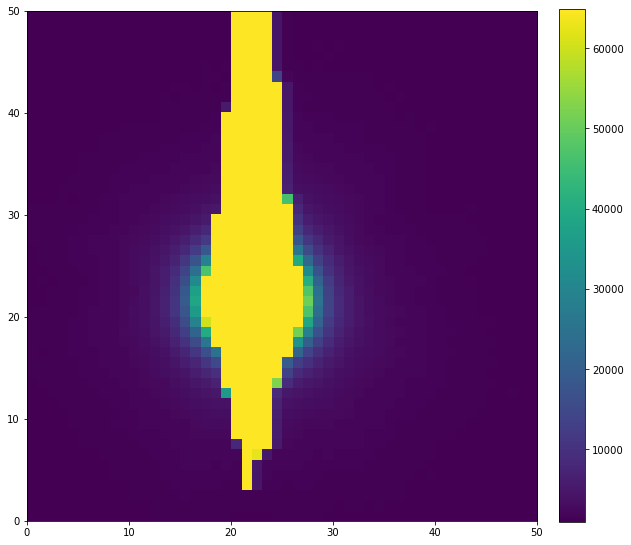

In [88]:
show_image(linearityTest[6][0].data[1450:1500,475:525])

In [89]:
pos = []
for i in range(len(linearityTest)):
    daofind = DAOStarFinder(fwhm=3,threshold=3000)
    sources = daofind(linearityTest[i][0].data[1450:1500,475:525])
    pos.append((sources[0]['xcentroid']+1450,sources[0]['ycentroid']+475))

pos = np.array(np.average(pos,axis=0),dtype=np.int64)
print(pos)
print(2**16)

[1474  493]
65536


In [90]:
expTime = []
counts = []

for i in range(len(linearityTest)):
    expTime.append(linearityTest[i][0].header['EXPTIME'])
    counts.append(np.average(linearityTest[i][0].data[pos[0]-5:pos[0]+5,pos[1]-5:pos[1]+5]))
    #counts.append(linearityTest[i][0].data[pos[0],pos[1]])
    

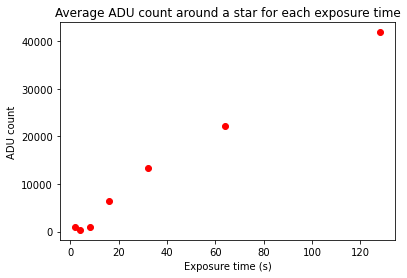

In [91]:
plt.plot(expTime,counts,'ro')
plt.title('Average ADU count around a star for each exposure time')
plt.xlabel('Exposure time (s)')
plt.ylabel('ADU count')
plt.show()
print()

### Discussion
As shown in the plot above, the CCD shows a roughly linear trend with exposure time, with some significant variations at lower exposure times. Plotting an average ADU per pixel in a frame shows a much more linear trend, but this graph was scrapped since it is doesn't represent a real use of the data (You aren't going to average over the whole starfield, instead you look at individual stars).

If instead I attempted to get the value of the center pixel of the star for each exposure time, the linearity also broke down near the top as even before the longest exposure, the ADU readings were peaking.

---

## Problem 3

Use photutils to perform aperture photometry on three (non saturated) stars in the
PG1633+099 standard field: a really faint one, a medium bright one, and a bright one.
Perform aperture photometry using at least 5 aperture sizes from very small to very large
and make a plot that reproduces the one from Howell Figure 5.7 showing S/N as a function
of aperture radius. What is a good aperture size to use for this dataset?

---

In [93]:
#Choose a science frame
starImg = scienceFrames[8][0].data
print(science_files[8])

a082otzf.fits


In [94]:
brightLoc = (615,1711)
mediumLoc = (326,1843)
faintLoc = (731,1745)
pos = [brightLoc,mediumLoc,faintLoc]

circs = [CircularAperture(pos,r=l) for l in np.arange(1,20)]

annulus = CircularAnnulus(pos[1],r_in=25,r_out=35)

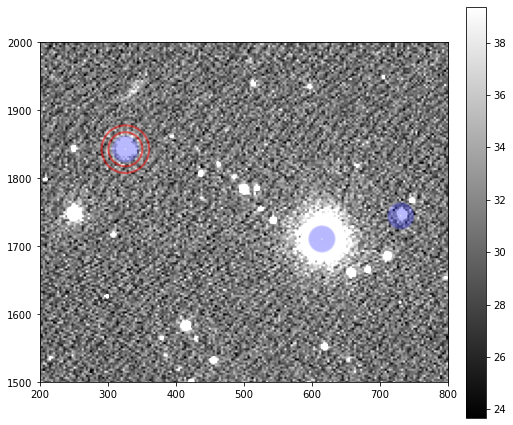

In [95]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
show_image(starImg,ax=ax,fig=fig,cmap='gray')

[c.plot(color='blue',lw=2,alpha=0.1) for c in circs]
annulus.plot(color='red',lw=2,alpha=.5)

ax.set_xlim([200,800]) # use these to zoom in/out
ax.set_ylim([1500,2000])

plt.show()

In [96]:
phot_table = aperture_photometry(starImg,annulus)
bgPerPix = phot_table['aperture_sum'][0]/annulus.area
print(bgPerPix)

31.843190559415625


In [97]:
photCircs = [aperture_photometry(starImg,c) for c in circs]
print(photCircs[0])

 id xcenter ycenter    aperture_sum   
      pix     pix                     
--- ------- ------- ------------------
  1   615.0  1711.0 180355.86488941452
  2   326.0  1843.0 15544.220084218285
  3   731.0  1745.0 1661.0552093949204


In [98]:
radius = [c.r for c in circs]
snrDim = []
snrMedium = []
snrBright = []

for c in circs:
    phot = aperture_photometry(starImg,c)
    
    #Calculate background
    bg = bgPerPix * c.area
    
    #Calculate the SNR
    sig = (phot['aperture_sum']-bg)
    snr = sig/(np.sqrt(sig)+bg)
    
    snrDim.append((snr[2]))
    snrMedium.append((snr[1]))
    snrBright.append((snr[0]))
    
radius = np.array(radius)
snrDim = np.array(snrDim)
snrMedium = np.array(snrMedium)
snrBright = np.array(snrBright)

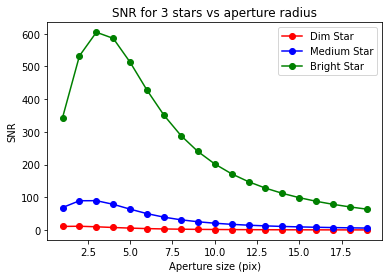

In [99]:
plt.plot(radius,snrDim,'ro-',label='Dim Star')
plt.plot(radius,snrMedium,'bo-',label='Medium Star')
plt.plot(radius,snrBright,'go-',label='Bright Star')
plt.title('SNR for 3 stars vs aperture radius')
plt.xlabel('Aperture size (pix)')
plt.ylabel('SNR')
plt.legend()
plt.show()

In [100]:
rdim = np.argmax(snrDim)
rmed = np.argmax(snrMedium)
rbri = np.argmax(snrBright)
print(radius[rdim],radius[rmed],radius[rbri])

2.0 3.0 3.0


### Discussion

As shown in the plot above, the radius of the circular aperture plays an important role in the signal to noise ratio. Best shown with the brightest star, the SNR peaks at a radius of 3 pixels before falling down. Similarly, the medium star and dim star showed this same behavior with a small exception of the dim star technically peaking at a radius of 2 pixels. This however is likely due to random chance and if testing more stars, the peak SNR should be the same radius as the other 2 at 3 pixels.

---
## Problem 4

Identify the standard stars in the PG1633+099 frame from Landolt (1992).

---

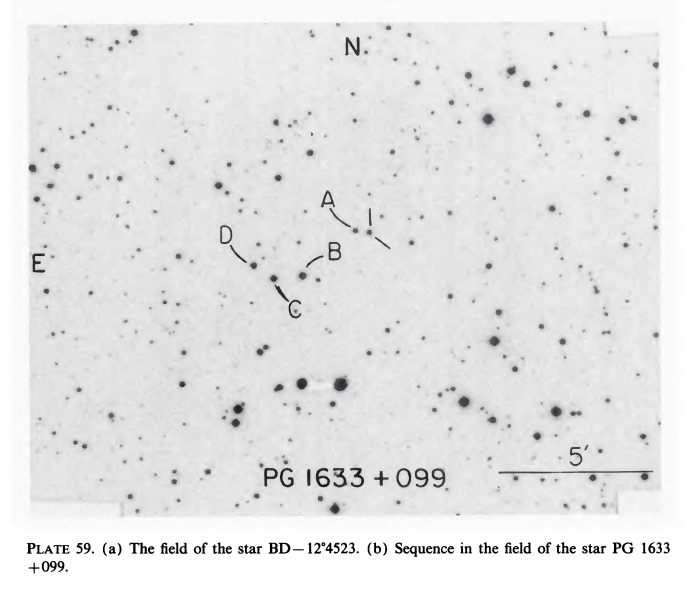

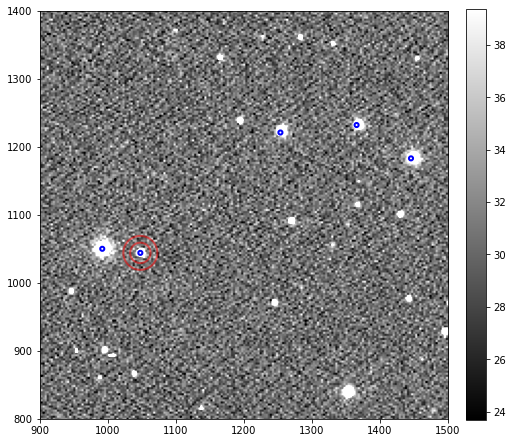

In [78]:
star1 = (992,1050)
starA = (1048,1044) 
starB = (1254,1221) 
starC = (1366,1232)
starD = (1446,1183)

starPos = [star1,starA,starB,starC,starD]
circles = CircularAperture(starPos,3)
annulus = CircularAnnulus(starA,15,25)

fig, ax = plt.subplots(1,1, figsize=(8,8))
show_image(starImg,ax=ax,fig=fig,cmap='gray')

[c.plot(color='blue',lw=2,alpha=1) for c in circles]
annulus.plot(color='red',lw=2,alpha=.5)

ax.set_xlim([900,1500]) # use these to zoom in/out
ax.set_ylim([800,1400])

plt.show()

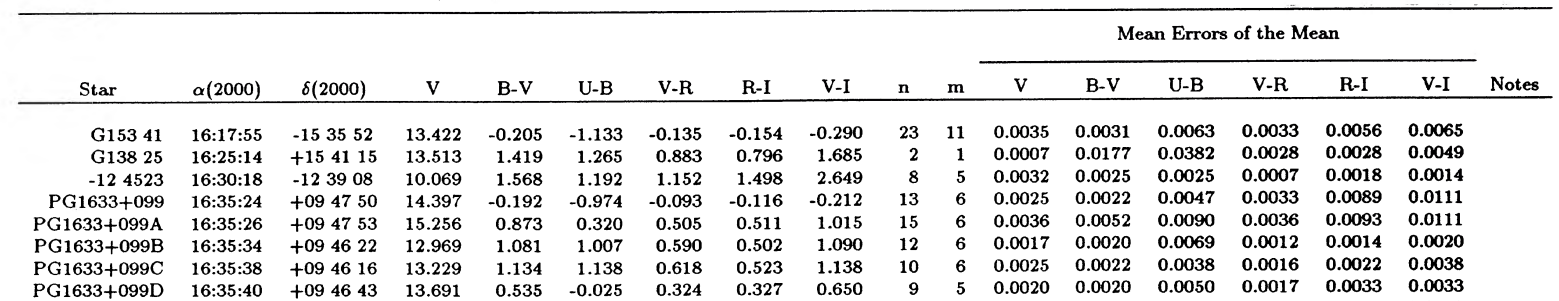

### Discussion

The 5 Landolt stars within PG1633+099 field were identified and circled using apertures. 

---
## Problem 5

Extract instrumental magnitudes for the UBVRI filters for all of your standard stars using
an approach that you’ve advocated for as best you can in the questions above.

---

In [94]:
#Counts and area
tot = aperture_photometry(starImg,circles)['aperture_sum']
area = circles[0].area #All circles are same size!

#Background
bg_t = aperture_photometry(starImg,annulus)
bg = bg_t['aperture_sum'][0]/annulus.area
print("Background per pixel: ",bg)

Background per pixel:  31.200951683287133


### instrumental magnitude
$m = -2.5\times\textrm{log}(T) = -2.5\times\textrm{log}(S-AB)$

In [101]:
#### mags = np.array([-2.5*np.log(t-area*bg) for t in tot])

print('Star1 mag:',mags[0])
print('StarA mag:',mags[1])
print('StarB mag:',mags[2])
print('StarC mag:',mags[3])
print('StarD mag:',mags[4])

Star1 mag: -28.722678105708923
StarA mag: -21.90691531037535
StarB mag: -25.76314165450626
StarC mag: -24.499734976426126
StarD mag: -27.086739036107467


### Discussion

Thankfully, this step was relatively straight forward and instrumental magnitudes were found successfully. While these numbers are very negative, it doesn't mean much until a true magnitude is found and each star can be converted. Instrumental magnitude can however be used to compare brightnesses. It appears correct in a brightness ranking as one conducted by eye.